# SARIMAX WITH RANDOM PARAMS

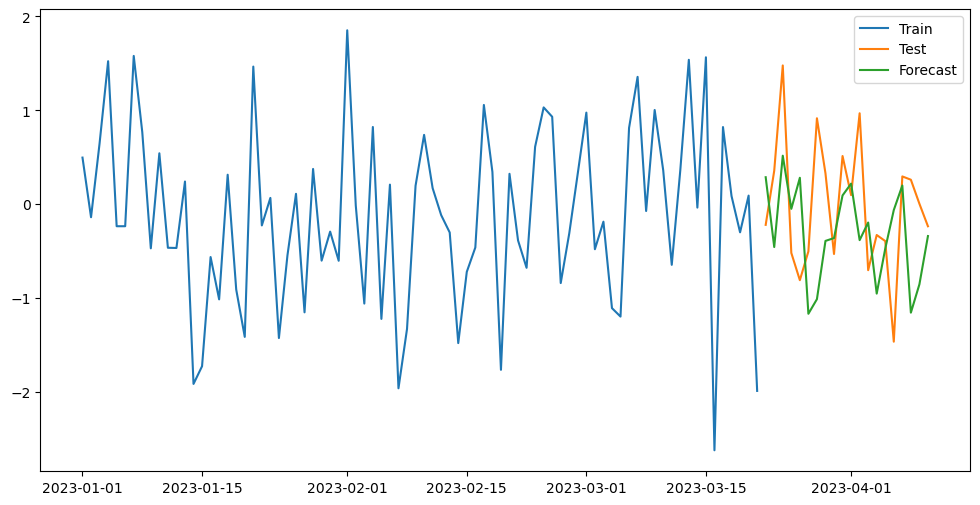

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Генерация примера временных рядов и экзогенных признаков
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100)

# Временные ряды
values_time_series1 = np.random.normal(0, 1, 100)
values_time_series2 = np.random.normal(0, 1, 100)

# Экзогенные признаки
exog_feature1 = np.random.normal(0, 1, 100)
exog_feature2 = np.random.normal(0, 1, 100)

# Создание DataFrame с временными рядами и экзогенными признаками
data = pd.DataFrame({'date': dates, 'time_series1': values_time_series1, 'time_series2': values_time_series2,
                      'exog_feature1': exog_feature1, 'exog_feature2': exog_feature2})
data.set_index('date', inplace=True)

# Разделение на train и test
train = data.iloc[:80]
test = data.iloc[80:]

# Построение SARIMAX модели с экзогенными переменными
model = SARIMAX(train['time_series1'], exog=train[['exog_feature1', 'exog_feature2']], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
result = model.fit()

# Прогнозирование
forecast = result.get_forecast(steps=len(test), exog=test[['exog_feature1', 'exog_feature2']])
forecast_mean = forecast.predicted_mean

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['time_series1'], label='Train')
plt.plot(test.index, test['time_series1'], label='Test')
plt.plot(test.index, forecast_mean, label='Forecast')
plt.legend()
plt.show()

# SARIMAX FOR TIMESERIES WITH DIFFERENT TRENDS AND NONE VALUES

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [3]:
osprey = pd.read_csv('osprey.csv')

In [4]:
osprey

,Lease,day,Gas Volume (MMscf),flowrate,Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,OSPREY,1.0,0.14500,504.39,718.0,0.0,2064.695943,14.695943,2064.695943,14.695943,Casing Pressure,5050.159793
1,OSPREY,2.0,0.18600,564.76,922.0,0.0,1989.695943,14.695943,1989.695943,14.695943,Casing Pressure,5009.599839
2,OSPREY,3.0,0.23100,653.51,753.0,0.0,1864.695943,14.695943,1864.695943,14.695943,Casing Pressure,4795.991972
3,OSPREY,4.0,0.26800,740.71,700.0,0.0,1814.695943,14.695943,1814.695943,14.695943,Casing Pressure,4696.626023
4,OSPREY,5.0,0.26100,678.06,530.0,0.0,1714.695943,14.695943,1714.695943,14.695943,Casing Pressure,4546.990059
...,...,...,...,...,...,...,...,...,...,...,...,...
2343,OSPREY,2351.0,0.00557,82.08,52.0,0.0,80.577943,85.645943,80.577943,14.695943,Casing Pressure,670.574038
2344,OSPREY,2352.0,0.00795,103.33,62.0,0.0,107.459943,79.905943,107.459943,14.695943,Casing Pressure,700.772439
2345,OSPREY,2353.0,0.00644,74.17,30.0,0.0,107.917943,81.628943,107.917943,14.695943,Casing Pressure,693.572677
2346,OSPREY,2354.0,0.00363,92.07,45.0,0.0,106.387943,83.382943,106.387943,14.695943,Casing Pressure,695.360877


In [22]:
osprey.groupby(['Pressure Source ']).size()

Pressure Source 
Casing Pressure    1847
Tubing Pressure     501
dtype: int64

In [23]:
cleanup_nums = {"Pressure Source ":     {"Casing Pressure": 1, "Tubing Pressure": 0}}

In [24]:
osprey = osprey.replace(cleanup_nums)
osprey

,Lease,day,Gas Volume (MMscf),flowrate,Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,OSPREY,1.0,0.14500,504.39,718.0,0.0,2064.695943,14.695943,2064.695943,14.695943,1,5050.159793
1,OSPREY,2.0,0.18600,564.76,922.0,0.0,1989.695943,14.695943,1989.695943,14.695943,1,5009.599839
2,OSPREY,3.0,0.23100,653.51,753.0,0.0,1864.695943,14.695943,1864.695943,14.695943,1,4795.991972
3,OSPREY,4.0,0.26800,740.71,700.0,0.0,1814.695943,14.695943,1814.695943,14.695943,1,4696.626023
4,OSPREY,5.0,0.26100,678.06,530.0,0.0,1714.695943,14.695943,1714.695943,14.695943,1,4546.990059
...,...,...,...,...,...,...,...,...,...,...,...,...
2343,OSPREY,2351.0,0.00557,82.08,52.0,0.0,80.577943,85.645943,80.577943,14.695943,1,670.574038
2344,OSPREY,2352.0,0.00795,103.33,62.0,0.0,107.459943,79.905943,107.459943,14.695943,1,700.772439
2345,OSPREY,2353.0,0.00644,74.17,30.0,0.0,107.917943,81.628943,107.917943,14.695943,1,693.572677
2346,OSPREY,2354.0,0.00363,92.07,45.0,0.0,106.387943,83.382943,106.387943,14.695943,1,695.360877


In [2]:
osprey1602 = pd.read_csv('osprey1602.csv')

In [3]:
cleanup_nums = {"Pressure Source ":     {"Casing Pressure": 1, "Tubing Pressure": 0}}
osprey1602 = osprey1602.replace(cleanup_nums)
osprey1602

,Unnamed: 0,period,Unnamed: 0.1,day,Gas Volume (MMscf),flowrate,Gas Lift Inj Volume (MMscf),Pressure Source _Tubing Pressure,Casing_Pressure_ksia,Tubing_Pressure_ksia,Active_Pressure_ksia,Line_Pressure_ksia,Calculated_Sandface_Pressure_ksia,water_thousand_bbl
0,OSPREY,OSPREY_1602.0_2355.0,1612,0.0,0.07579,171.20,0.0,0,0.055000,0.280000,0.055000,0.014696,0.622504,0.067
1,OSPREY,OSPREY_1602.0_2355.0,1613,1.0,0.07362,221.14,0.0,0,0.060000,0.280000,0.060000,0.014696,0.621820,0.087
2,OSPREY,OSPREY_1602.0_2355.0,1614,2.0,0.09300,210.00,0.0,0,0.060000,0.340000,0.060000,0.014696,0.618870,0.073
3,OSPREY,OSPREY_1602.0_2355.0,1615,3.0,0.07400,230.72,0.0,0,0.060000,0.280000,0.060000,0.014696,0.620592,0.090
4,OSPREY,OSPREY_1602.0_2355.0,1616,4.0,0.07200,195.00,0.0,0,0.050000,0.280000,0.050000,0.014696,0.612925,0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,OSPREY,OSPREY_1602.0_2355.0,2343,731.0,0.00557,82.08,0.0,0,0.080578,0.085646,0.080578,0.014696,0.670574,0.052
732,OSPREY,OSPREY_1602.0_2355.0,2344,732.0,0.00795,103.33,0.0,0,0.107460,0.079906,0.107460,0.014696,0.700772,0.062
733,OSPREY,OSPREY_1602.0_2355.0,2345,733.0,0.00644,74.17,0.0,0,0.107918,0.081629,0.107918,0.014696,0.693573,0.030
734,OSPREY,OSPREY_1602.0_2355.0,2346,734.0,0.00363,92.07,0.0,0,0.106388,0.083383,0.106388,0.014696,0.695361,0.045


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


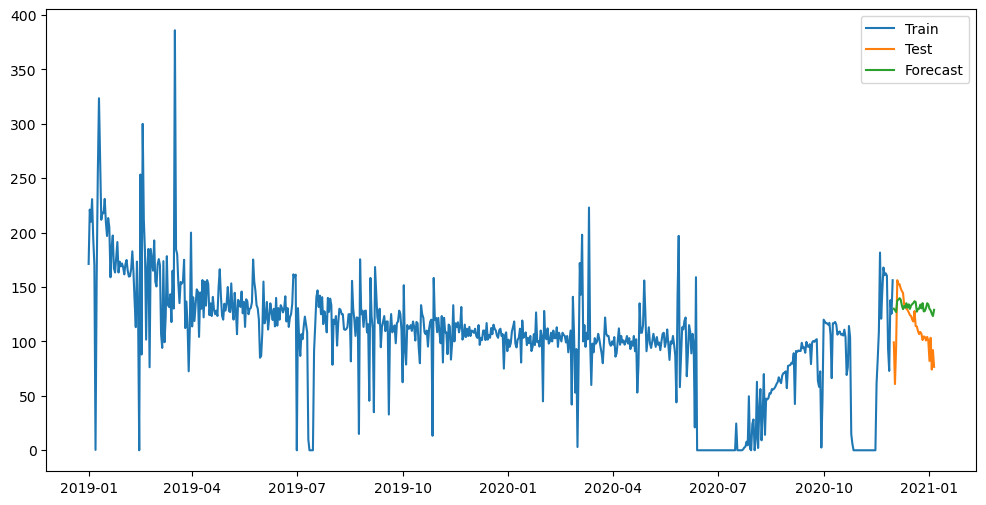

In [4]:


# Генерация примера временных рядов и экзогенных признаков
np.random.seed(42)
dates = pd.date_range('2019-01-01', periods=736)

# Временные ряды
values_time_series = osprey1602['flowrate']


# Экзогенные признаки
exog_feature1 = osprey1602['Casing_Pressure_ksia']
exog_feature2 = osprey1602['Tubing_Pressure_ksia']
exog_feature3 = osprey1602['Active_Pressure_ksia']
exog_feature4 = osprey1602['Line_Pressure_ksia']
exog_feature5 = osprey1602['Calculated_Sandface_Pressure_ksia']
exog_feature6 = osprey1602['water_thousand_bbl']
exog_feature7 = osprey1602['Gas Lift Inj Volume  (MMscf)']
exog_feature8 = osprey1602['Gas Volume (MMscf)']

# Создание DataFrame с временными рядами и экзогенными признаками
data = pd.DataFrame({'date': dates, 'time_series': values_time_series,
                      'exog_feature1': exog_feature1, 'exog_feature2': exog_feature2, 'exog_feature3': exog_feature3, 'exog_feature4': exog_feature4,
                   'exog_feature5': exog_feature5, 'exog_feature6': exog_feature6, 'exog_feature7': exog_feature7, 'exog_feature8': exog_feature8 })
data.set_index('date', inplace=True)

# Разделение на train и test
train = data.iloc[:700]
test = data.iloc[700:]

# Построение SARIMAX модели с экзогенными переменными
model = SARIMAX(train['time_series'], exog=train[['exog_feature1', 'exog_feature2','exog_feature3', 'exog_feature4','exog_feature5', 'exog_feature6','exog_feature7', 'exog_feature8']], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
result = model.fit()

# Прогнозирование
forecast = result.get_forecast(steps=len(test), exog=test[['exog_feature1', 'exog_feature2','exog_feature3', 'exog_feature4','exog_feature5', 'exog_feature6','exog_feature7', 'exog_feature8']])
forecast_mean = forecast.predicted_mean

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['time_series'], label='Train')
plt.plot(test.index, test['time_series'], label='Test')
plt.plot(test.index, forecast_mean, label='Forecast')
plt.legend()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(osprey1602['flowrate'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.161820
p-value: 0.022304
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


p<0.05 ряд стационарный


D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


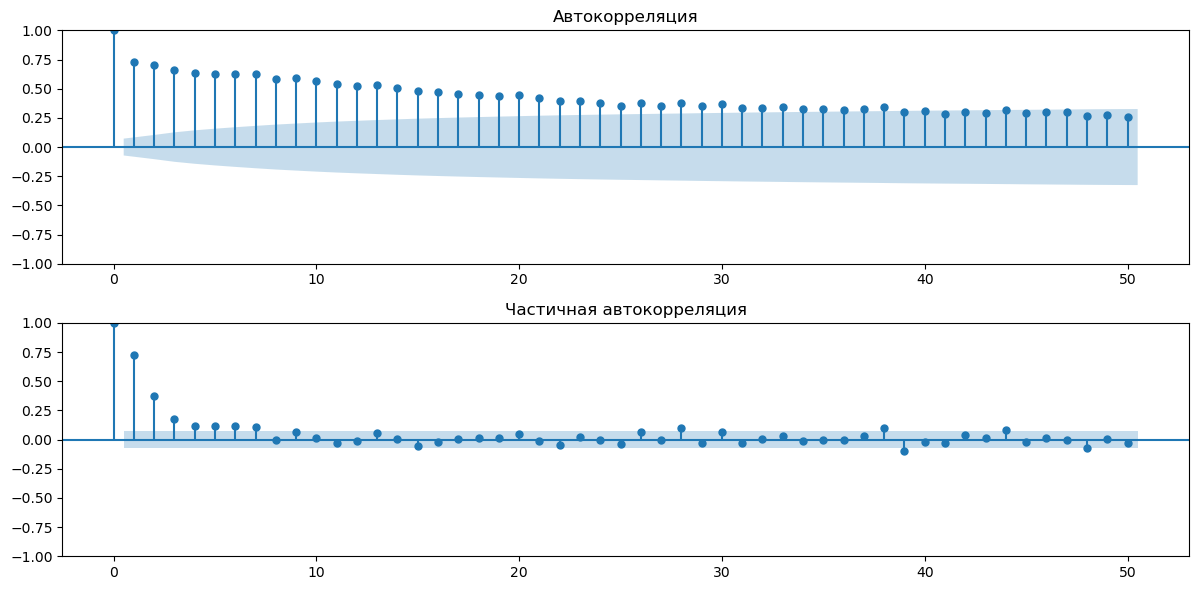

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(osprey1602['flowrate'], lags=50, ax=plt.gca())
plt.title('Автокорреляция')

plt.subplot(212)
plot_pacf(osprey1602['flowrate'], lags=50, ax=plt.gca())
plt.title('Частичная автокорреляция')

plt.tight_layout()
plt.show()

# SARIMAX WITH ALL EXOG COLUMNS AND VALUES (GOOD RESULT ON TEST)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


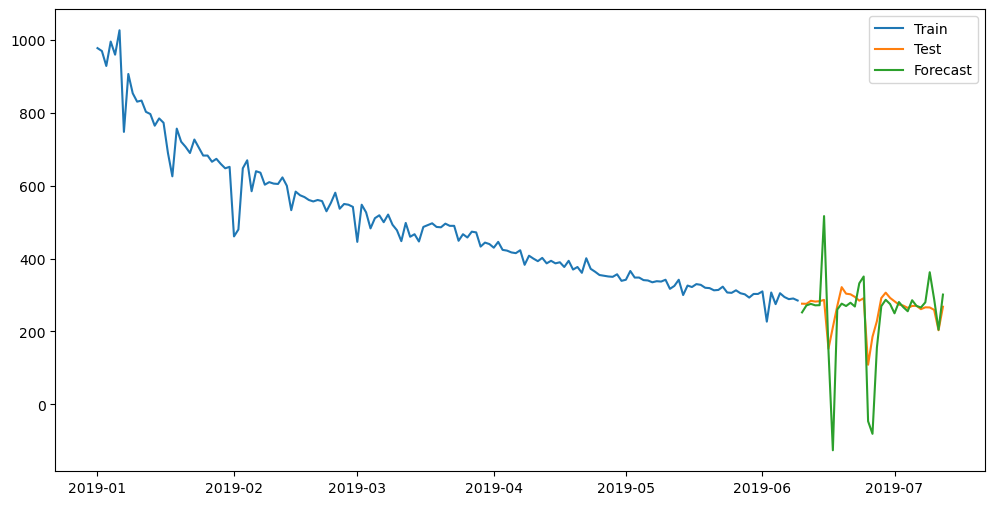

In [48]:
np.random.seed(42)
dates = pd.date_range('2019-01-01', periods=193)

# Временные ряды
values_time_series = crow24['flowrate']


# Экзогенные признаки
exog_feature1 = crow24['Casing_Pressure_ksia']
exog_feature2 = crow24['Tubing_Pressure_ksia']
exog_feature3 = crow24['Active_Pressure_ksia']
exog_feature4 = crow24['Line_Pressure_ksia']
exog_feature5 = crow24['Calculated_Sandface_Pressure_ksia']
exog_feature6 = crow24['water_thousand_bbl']
exog_feature7 = crow24['Gas Lift Inj Volume  (MMscf)']
exog_feature8 = crow24['Gas Volume (MMscf)']

# Создание DataFrame с временными рядами и экзогенными признаками
data = pd.DataFrame({'date': dates, 'time_series': values_time_series,
                      'exog_feature1': exog_feature1, 'exog_feature2': exog_feature2, 'exog_feature3': exog_feature3, 'exog_feature4': exog_feature4,
                   'exog_feature5': exog_feature5, 'exog_feature6': exog_feature6, 'exog_feature7': exog_feature7, 'exog_feature8': exog_feature8 })
data.set_index('date', inplace=True)

# Разделение на train и test
train = data.iloc[:160]
test = data.iloc[160:]

# Построение SARIMAX модели с экзогенными переменными
model = SARIMAX(train['time_series'], exog=train[['exog_feature1', 'exog_feature2','exog_feature3', 'exog_feature4','exog_feature5', 'exog_feature6','exog_feature7', 'exog_feature8']], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
result = model.fit()

# Прогнозирование
forecast = result.get_forecast(steps=len(test), exog=test[['exog_feature1', 'exog_feature2','exog_feature3', 'exog_feature4','exog_feature5', 'exog_feature6','exog_feature7', 'exog_feature8']])
forecast_mean = forecast.predicted_mean

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['time_series'], label='Train')
plt.plot(test.index, test['time_series'], label='Test')
plt.plot(test.index, forecast_mean, label='Forecast')
plt.legend()
plt.show()

# XGBOOSTING VERY BAD RESULTS FOR SUCH DIFFICULT MODEL

In [4]:
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import scipy.stats as scs
from scipy.optimize import minimize
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [9]:
np.random.seed(42)

eagle205=pd.read_csv('eagle205.csv')


dates = pd.date_range('2018-01-01', periods=1164)

# Временные ряды
values_time_series = eagle205['flowrate']


# Экзогенные признаки
exog_feature1 = eagle205['Casing_Pressure_ksia']
exog_feature2 = eagle205['Tubing_Pressure_ksia']
exog_feature3 = eagle205['Active_Pressure_ksia']
exog_feature4 = eagle205['Line_Pressure_ksia']
exog_feature5 = eagle205['Calculated_Sandface_Pressure_ksia']
exog_feature6 = eagle205['water_thousand_bbl']
exog_feature7 = eagle205['Gas Lift Inj Volume  (MMscf)']
exog_feature8 = eagle205['Gas Volume (MMscf)']

# Создание DataFrame с временными рядами и экзогенными признаками
data = pd.DataFrame({'date': dates, 'time_series': values_time_series,
                      'Casing_Pressure_ksia': exog_feature1, 'Tubing_Pressure_ksia': exog_feature2, 'Active_Pressure_ksia': exog_feature3, 'Line_Pressure_ksia': exog_feature4,
                   'Calculated_Sandface_Pressure_ksia': exog_feature5, 'water_thousand_bbl': exog_feature6, 'Gas Lift Inj Volume  (MMscf)': exog_feature7, 'Gas Volume (MMscf)': exog_feature8 })
data.set_index('date', inplace=True)

In [30]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    #data.index = data.index.to_datetime()
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1

    # считаем средние только по тренировочной части, чтобы избежать лика
    data['weekday_average'] = map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday)

    # выкидываем закодированные средними признаки 
    data.drop(["weekday"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [10]:
import xgboost as xgb

def XGB_forecast(data, lag_start=5, lag_end=20, test_size=0.15, scale=1.96):

    # исходные данные
    test_size=0.15
    test_index = int(len(data)*(1-test_size))
    data = data.reset_index(drop=True)
    data = data.dropna()
    data = data.reset_index(drop=True)
    X_train = data.loc[:test_index].drop(["time_series"], axis=1)
    y_train = data.loc[:test_index]["time_series"]
    X_test = data.loc[test_index:].drop(["time_series"], axis=1)
    y_test = data.loc[test_index:]["time_series"]
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)

    # задаём параметры
    params = {
        'objective': 'reg:linear',
        'booster':'gblinear'
    }
    trees = 1000

    # прогоняем на кросс-валидации с метрикой rmse
    cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

    # обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
    bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

    # можно построить кривые валидации
    #cv.plot(y=['test-mae-mean', 'train-mae-mean'])

    # запоминаем ошибку на кросс-валидации
    deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train = bst.predict(dtrain)
    plt.figure(figsize=(15, 5))
    plt.plot(prediction_train)
    plt.plot(y_train)
    plt.axis('tight')
    plt.grid(True)

    # и на тестовом
    prediction_test = bst.predict(dtest)
    lower = prediction_test-scale*deviation
    upper = prediction_test+scale*deviation

    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]

    plt.figure(figsize=(15, 5))
    plt.plot(prediction_test, label="prediction")
    plt.plot(lower, "r--", label="upper bond / lower bond")
    plt.plot(upper, "r--")
    plt.plot(list(y_test), label="y_test")
    plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
    plt.grid(True)
    plt.legend()

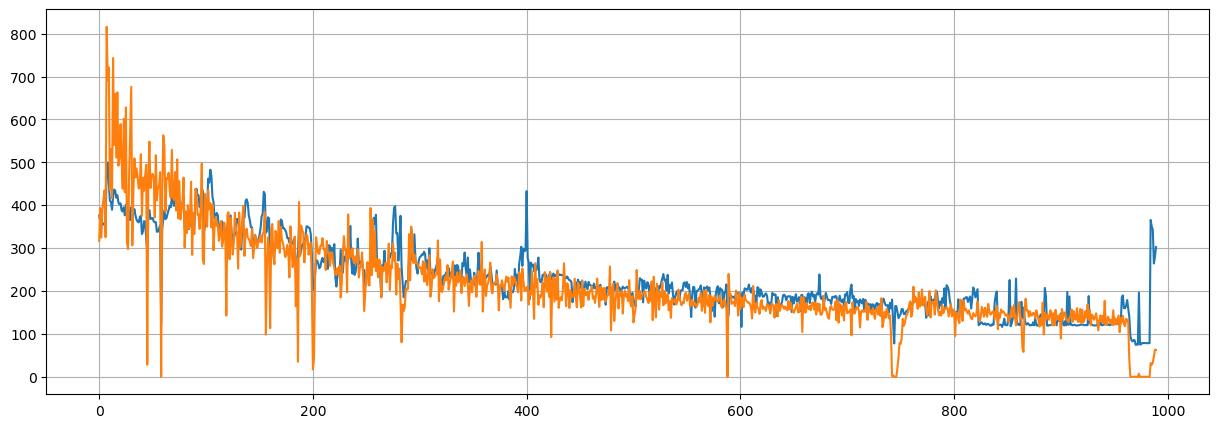

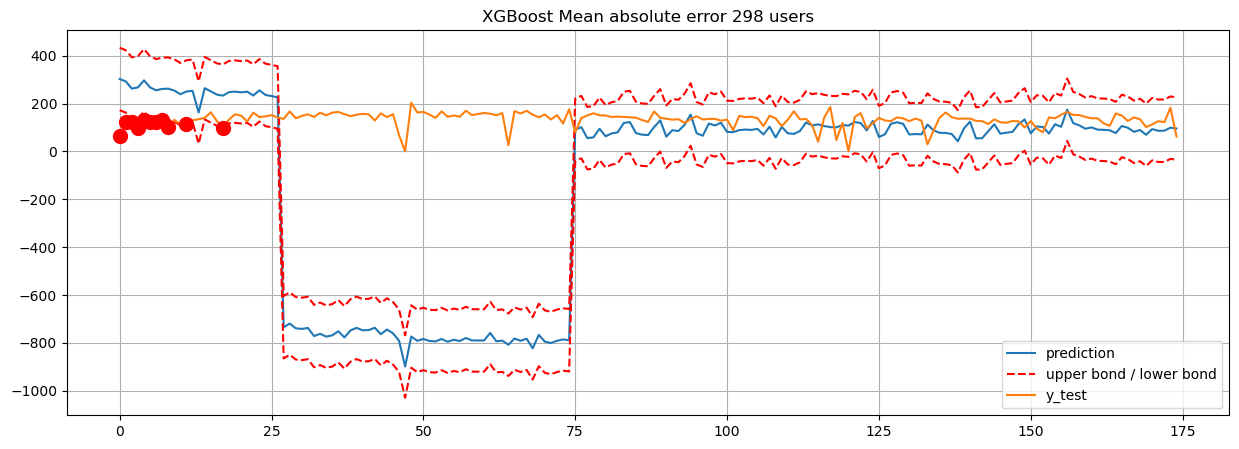

In [12]:
XGB_forecast(data, test_size=0.2, lag_start=5, lag_end=30)

# LSTM - REALLY GOOD PREDICTIONS/ BUT TOO LONG TRAINING

In [14]:
data = data.filter(['time_series'])
# Convert the dataframe to a numpy array
dataset1 = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset1) * .98 ))

training_data_len

1141

In [15]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset1)

scaled_data

array([[0.38808483],
       [0.48204221],
       [0.39772538],
       ...,
       [0.14959517],
       [0.22361469],
       [0.07606575]])

In [16]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.38808483, 0.48204221, 0.39772538, 0.47885524, 0.5076078 ,
       0.53263549, 0.39865905, 1.        , 0.84620088, 0.88338096,
       0.53454694, 0.65126401, 0.51010738, 0.91079918, 0.66238838,
       0.80822436, 0.62608928, 0.81272116, 0.60312742, 0.62632821,
       0.72165791, 0.61693394, 0.53724012, 0.73704015, 0.52756403,
       0.76946734, 0.38313835, 0.36487301, 0.57600449, 0.69653097])]
[0.8283901212543007]

[array([0.38808483, 0.48204221, 0.39772538, 0.47885524, 0.5076078 ,
       0.53263549, 0.39865905, 1.        , 0.84620088, 0.88338096,
       0.53454694, 0.65126401, 0.51010738, 0.91079918, 0.66238838,
       0.80822436, 0.62608928, 0.81272116, 0.60312742, 0.62632821,
       0.72165791, 0.61693394, 0.53724012, 0.73704015, 0.52756403,
       0.76946734, 0.38313835, 0.36487301, 0.57600449, 0.69653097]), array([0.48204221, 0.39772538, 0.47885524, 0.5076078 , 0.53263549,
       0.39865905, 1.        , 0.84620088, 0.88338096, 0.53454694,
       0.65126401, 0.51010738, 0.9

In [17]:
%%time
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=50)




Epoch 1/50

1111/1111 [==============================] - 12s 8ms/step - loss: 0.0048
Epoch 2/50
1111/1111 [==============================] - 9s 8ms/step - loss: 0.0041
Epoch 3/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0039
Epoch 4/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 5/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0037
Epoch 6/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 7/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0035
Epoch 8/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0037
Epoch 9/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0034
Epoch 10/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0033
Epoch 11/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0032
Epoch 12/50
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0

In [18]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset1[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 610ms/step


28.9530784551884

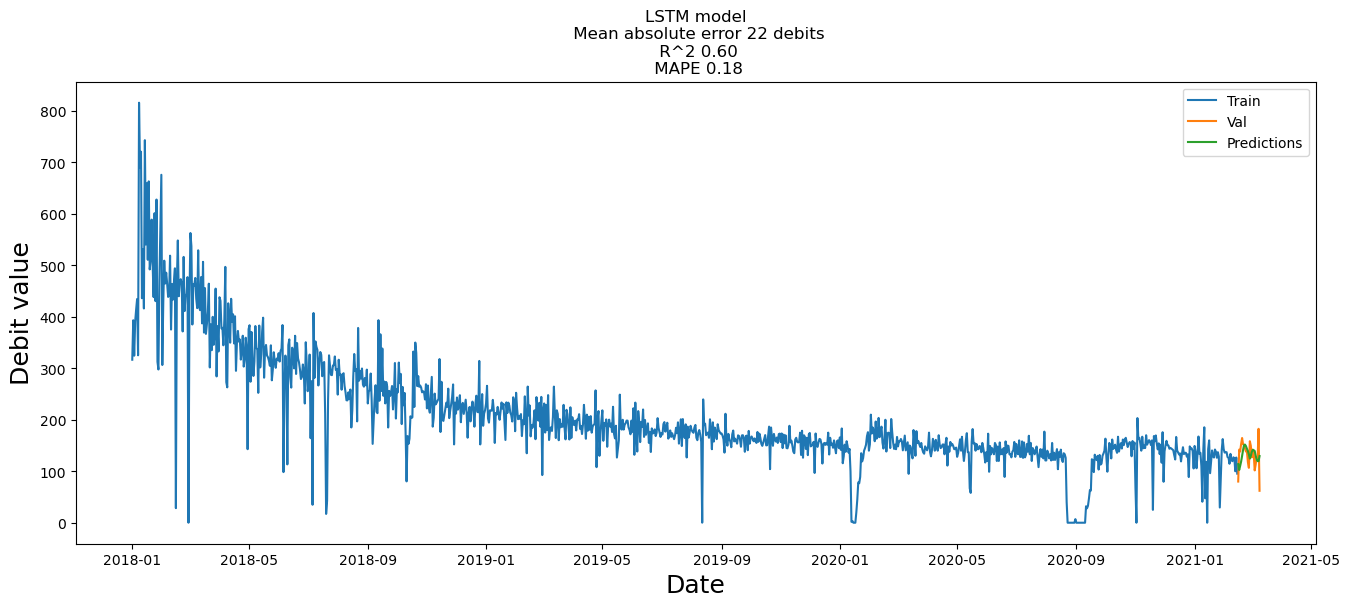

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title(f"LSTM model\n Mean absolute error {round(mean_absolute_error(predictions, y_test))} debits\n R^2 0.60\n MAPE {round(mean_absolute_percentage_error(predictions, y_test),2)}")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Debit value', fontsize=18)
plt.plot(train['time_series'])
plt.plot(valid[['time_series', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [23]:
def r2(y_true, y_pred):
    
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

In [24]:
r2(y_test, predictions)

-0.18906383518167424

In [25]:
valid

,time_series,Predictions
date,,
2021-02-15,80.01,113.800049
2021-02-16,142.08,102.472588
2021-02-17,138.33,110.405670
2021-02-18,152.93,118.936989
2021-02-19,164.58,129.745224
2021-02-20,152.50,141.282303
2021-02-21,151.66,150.779556
2021-02-22,144.17,151.779999
2021-02-23,138.33,148.888763


In [26]:
train

,time_series
date,
2018-01-01,316.730
2018-01-02,393.412
2018-01-03,324.598
2018-01-04,390.811
2018-01-05,414.277
...,...
2021-02-10,127.090
2021-02-11,125.410
2021-02-12,100.010


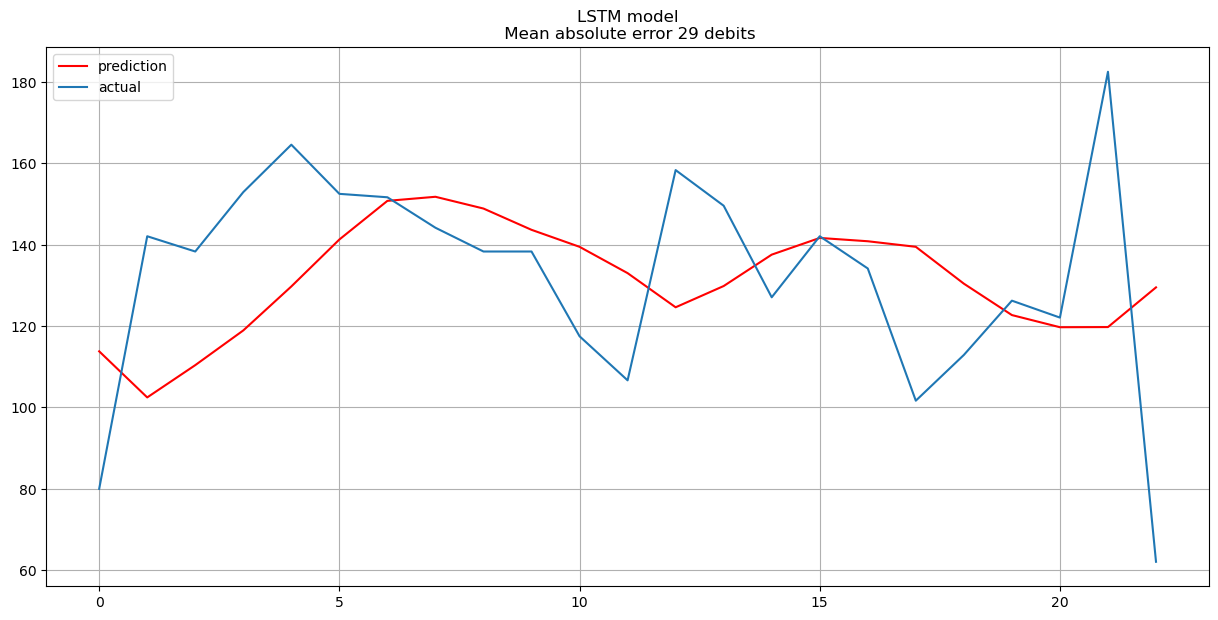

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(predictions, "r", label="prediction")
plt.plot(y_test, label="actual")
plt.legend(loc="best")
plt.title("LSTM model\n Mean absolute error {} debits".format(round(np.sqrt(np.mean(((predictions - y_test) ** 2))))))
plt.grid(True);